# Opgave



# Installer libraries

In [1]:
!python.exe -m pip install --upgrade pip

!pip install pandas

!pip install scikit-learn   

!pip install tensorflow

!pip install numpy

!pip install matplotlib

# Brug Panda til at læse (og vise) data fra csv-regnearket som indeholder træningsdata

In [2]:
import pandas as pd

df = pd.read_csv('wall2.csv')

X = pd.get_dummies(df.drop(['motor'], axis=1)) #
Y = pd.get_dummies(df.drop(['afstand'], axis=1))

print(X)

    afstand
0       0.0
1       0.5
2       1.0
3       1.5
4       2.0
5       2.5
6       3.0
7       3.5
8       4.0
9       4.5
10      5.0
11      5.5
12      6.0
13      6.5
14      7.0
15      7.5
16      8.0
17      8.5
18      9.0
19      9.5
20     10.0


# Byg efter bedste fornemmelse et neuralt netværk

In [3]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=30, activation='tanh', input_dim=1))                                                              # 1 input til 30 neuroner i et skjult lag
model.add(Dense(units=1, activation='linear'))  #sigmoid kan ikke bruges da positiv og negativ signal ønskes            # (2) output

model.compile(loss="mean_squared_error", optimizer='Adam')#, metrics='accuracy')  #sgd  loss='binary_crossentropy'/"mean_squared_error"


C:\Users\chr_v\Documents\eaa23itek\3semester\Kunstig-Intelligens\ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Konverter træningsdata til et array af float


In [4]:
import numpy as np

X_train = np.asarray(X).astype('float32')
y_train = np.asarray(Y).astype('float32')


# Og træn med disse data, og plot data

In [5]:
model.fit(X_train, y_train, epochs=200, batch_size=20)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4412  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3652 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2972 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2337 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1873
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1464 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1162  
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0903 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0765  
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0625 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0566 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0525 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0509  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0506  
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0486  
Epoch 16/200
2/2 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


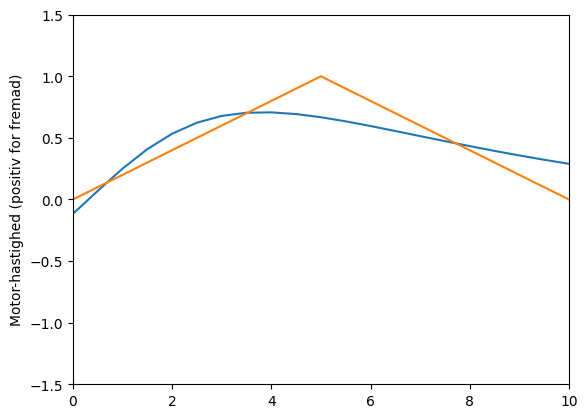

In [6]:
import matplotlib.pyplot as plt

test_afstand = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])

b = model.predict(test_afstand)    #b  er de af netværket estimerede værdier for højre og venstre -motor (2-dimensionelt)
plt.plot(test_afstand,b)           # her plottes b  (orange og blåtyrkis)
plt.plot(X, Y)                        # Y er træningsdata for output (rød og grøn)
plt.ylabel('Motor-hastighed (positiv for fremad)')
plt.axis((0, 10, -1.5, 1.5))
plt.show()

# mere træning, og plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


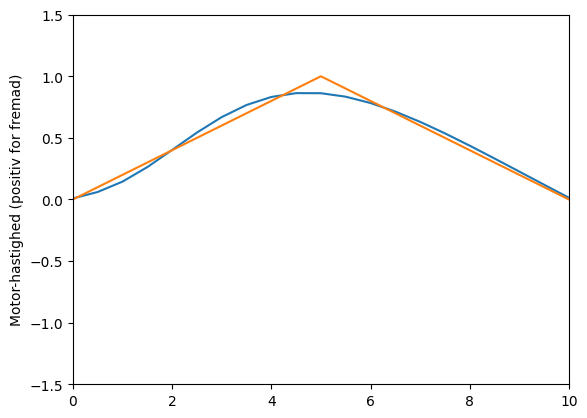

In [7]:
model.fit(X_train, y_train, epochs=2000, batch_size=20, verbose=0)

b = model.predict(test_afstand)    #b  er de af netværket estimerede værdier for højre og venstre -motor (2-dimensionelt)
plt.plot(test_afstand,b)           # her plottes b  (orange og blåtyrkis)
plt.plot(X,Y)                        # Y er træningsdata for output (rød og grøn)
plt.ylabel('Motor-hastighed (positiv for fremad)')
plt.axis((0, 10, -1.5, 1.5))
plt.show()

In [8]:
a = model.predict(pd.Series([5,11]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [9]:
print(a)

[[ 0.8626032 ]
 [-0.19068995]]
